##Breast Cancer Classification using Logistic Regression
#  **BY: Atajan Arashev 10/11/2024**

In this notebook, we will explore the application of Logistic Regression to classify breast cancer as either benign or malignant. The dataset used is the Breast Cancer Wisconsin (Original) dataset, which contains measurements of various characteristics of cell nuclei present in breast tissue samples.

#Dataset Overview:
The dataset was originally provided by William Wolberg in 1990 and is publicly available through the UCI Machine Learning Repository:

#Citation:
Wolberg, W. (1990). Breast Cancer Wisconsin (Original) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5HP4Z

This dataset contains 683 instances with 10 features that describe characteristics of the cell nuclei, including:

#Clump Thickness
* Uniformity of Cell Size
* Uniformity of Cell Shape
* Marginal Adhesion
* Bare Nuclei, and more.
* The target variable (Class) classifies tumors into:

* 2 (benign)
* 4 (malignant)
#Goal:
The objective of this analysis is to build a logistic regression model that accurately predicts whether a tumor is benign or malignant based on the input features. We will also compare models using all features and a subset of important features, evaluating their performance in terms of accuracy and consistency using cross-validation.

# Logistic Regression

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[: 1 :-1].values
y = dataset.iloc[:, -1].values

##Summary Statistics:
This section provides a high-level overview of the numeric features in the dataset. We can observe the count, mean, standard deviation, minimum, and maximum values for each feature. Notably, 'Clump Thickness', 'Uniformity of Cell Size', and 'Bare Nuclei' show a wide range, which might contribute significantly to the target classification.

There are no missing values in the dataset. This means we can proceed without needing to impute or drop data due to missing entries.

All the features are integers, which is appropriate for this dataset since the values represent ordinal or categorical data (e.g., 'Clump Thickness' values range from 1 to 10).


In [47]:
# 1. Summary statistics
print("Summary Statistics:")
print(dataset.describe())

# 2. Checking for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())

# 3. Data types
print("\nData Types:")
print(dataset.dtypes)



Summary Statistics:
       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.830000e+02       683.000000               683.000000   
mean         1.076720e+06         4.442167                 3.150805   
std          6.206440e+05         2.820761                 3.065145   
min          6.337500e+04         1.000000                 1.000000   
25%          8.776170e+05         2.000000                 1.000000   
50%          1.171795e+06         4.000000                 1.000000   
75%          1.238705e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                683.000000         683.000000   
mean                   3.215227           2.830161   
std                    2.988581           2.864562   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%             

##Feature Distributions:
The histograms for each feature show their distribution. Features like 'Clump Thickness' and 'Uniformity of Cell Size' have a spread across the entire range, while others, such as 'Mitoses', have data heavily concentrated at lower values. This could indicate that some features might be more important for classification than others.


<Figure size 2000x1500 with 0 Axes>

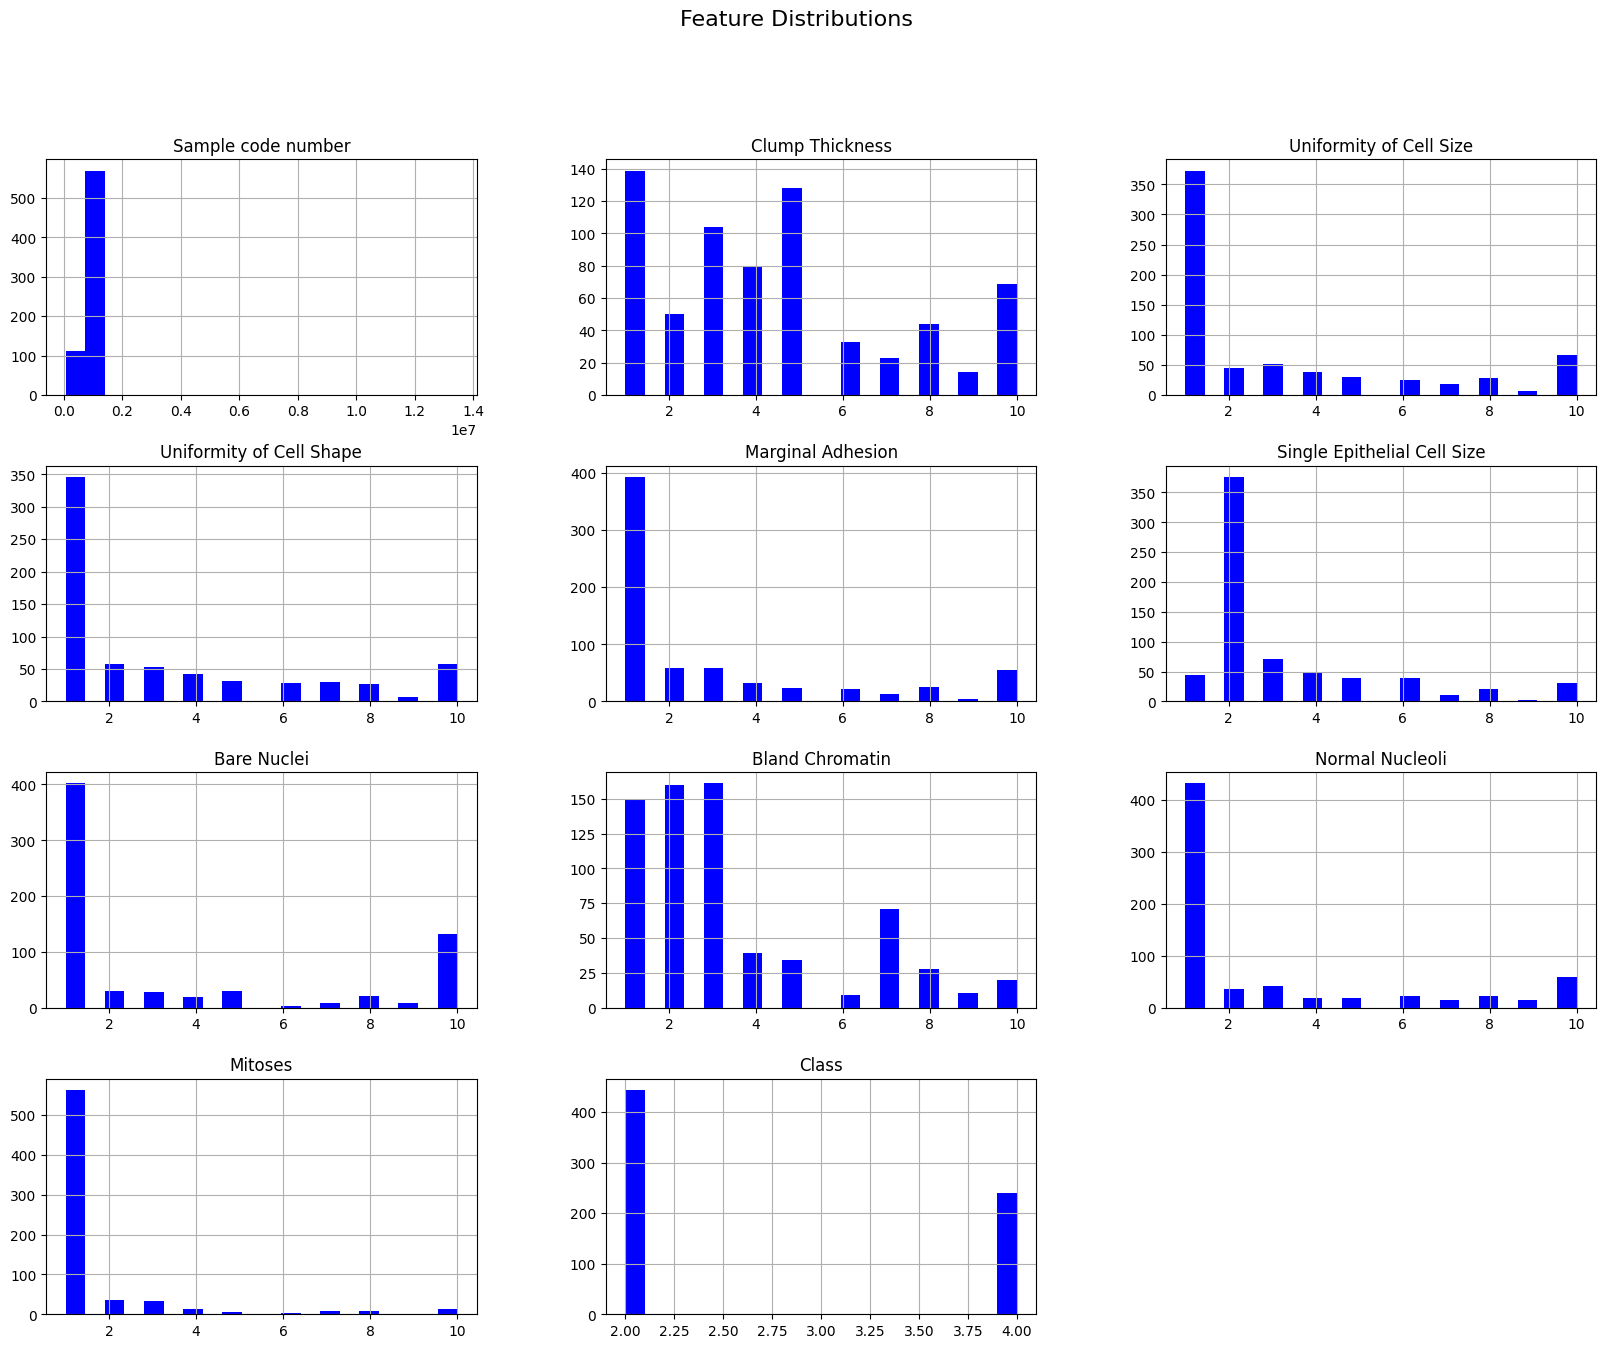

In [50]:
# 4. Visualizing the distribution of each feature
plt.figure(figsize=(20, 15))
dataset.hist(bins=20, figsize=(20, 15), color='blue')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


##Correlation Matrix Heatmap
The correlation matrix visualizes the relationships between features. We observe that 'Uniformity of Cell Size' and 'Uniformity of Cell Shape' are highly correlated, suggesting these features may be capturing similar information. This helps in understanding how the features are interrelated and might help in feature selection later.


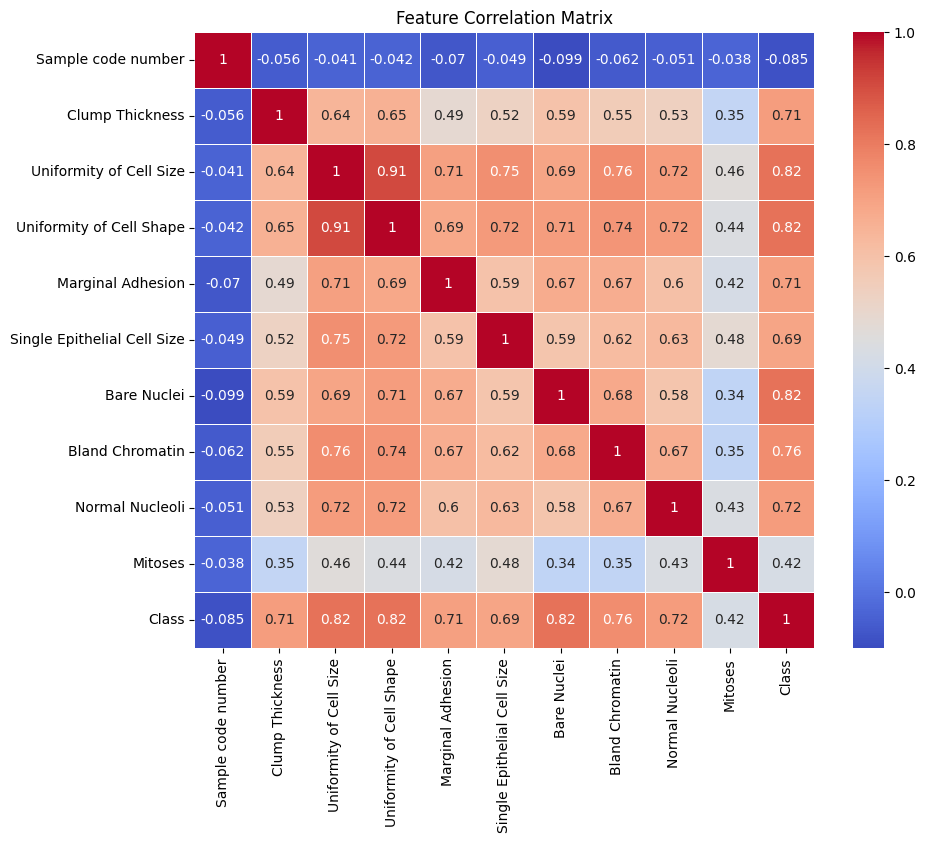

In [49]:

# 5. Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()



## Boxplots (Outlier Detection) and Pairplot
* Boxplots (Outlier Detection):
The boxplots show potential outliers in features like 'Bare Nuclei' and 'Mitoses'. Outliers can have an impact on model performance, so they may need to be handled depending on their influence.
* Pairplot:
The pairplot helps visualize how different features relate to each other and to the target class (malignant or benign). This can give an intuitive understanding of which features may be more separable between classes, helping in model building.


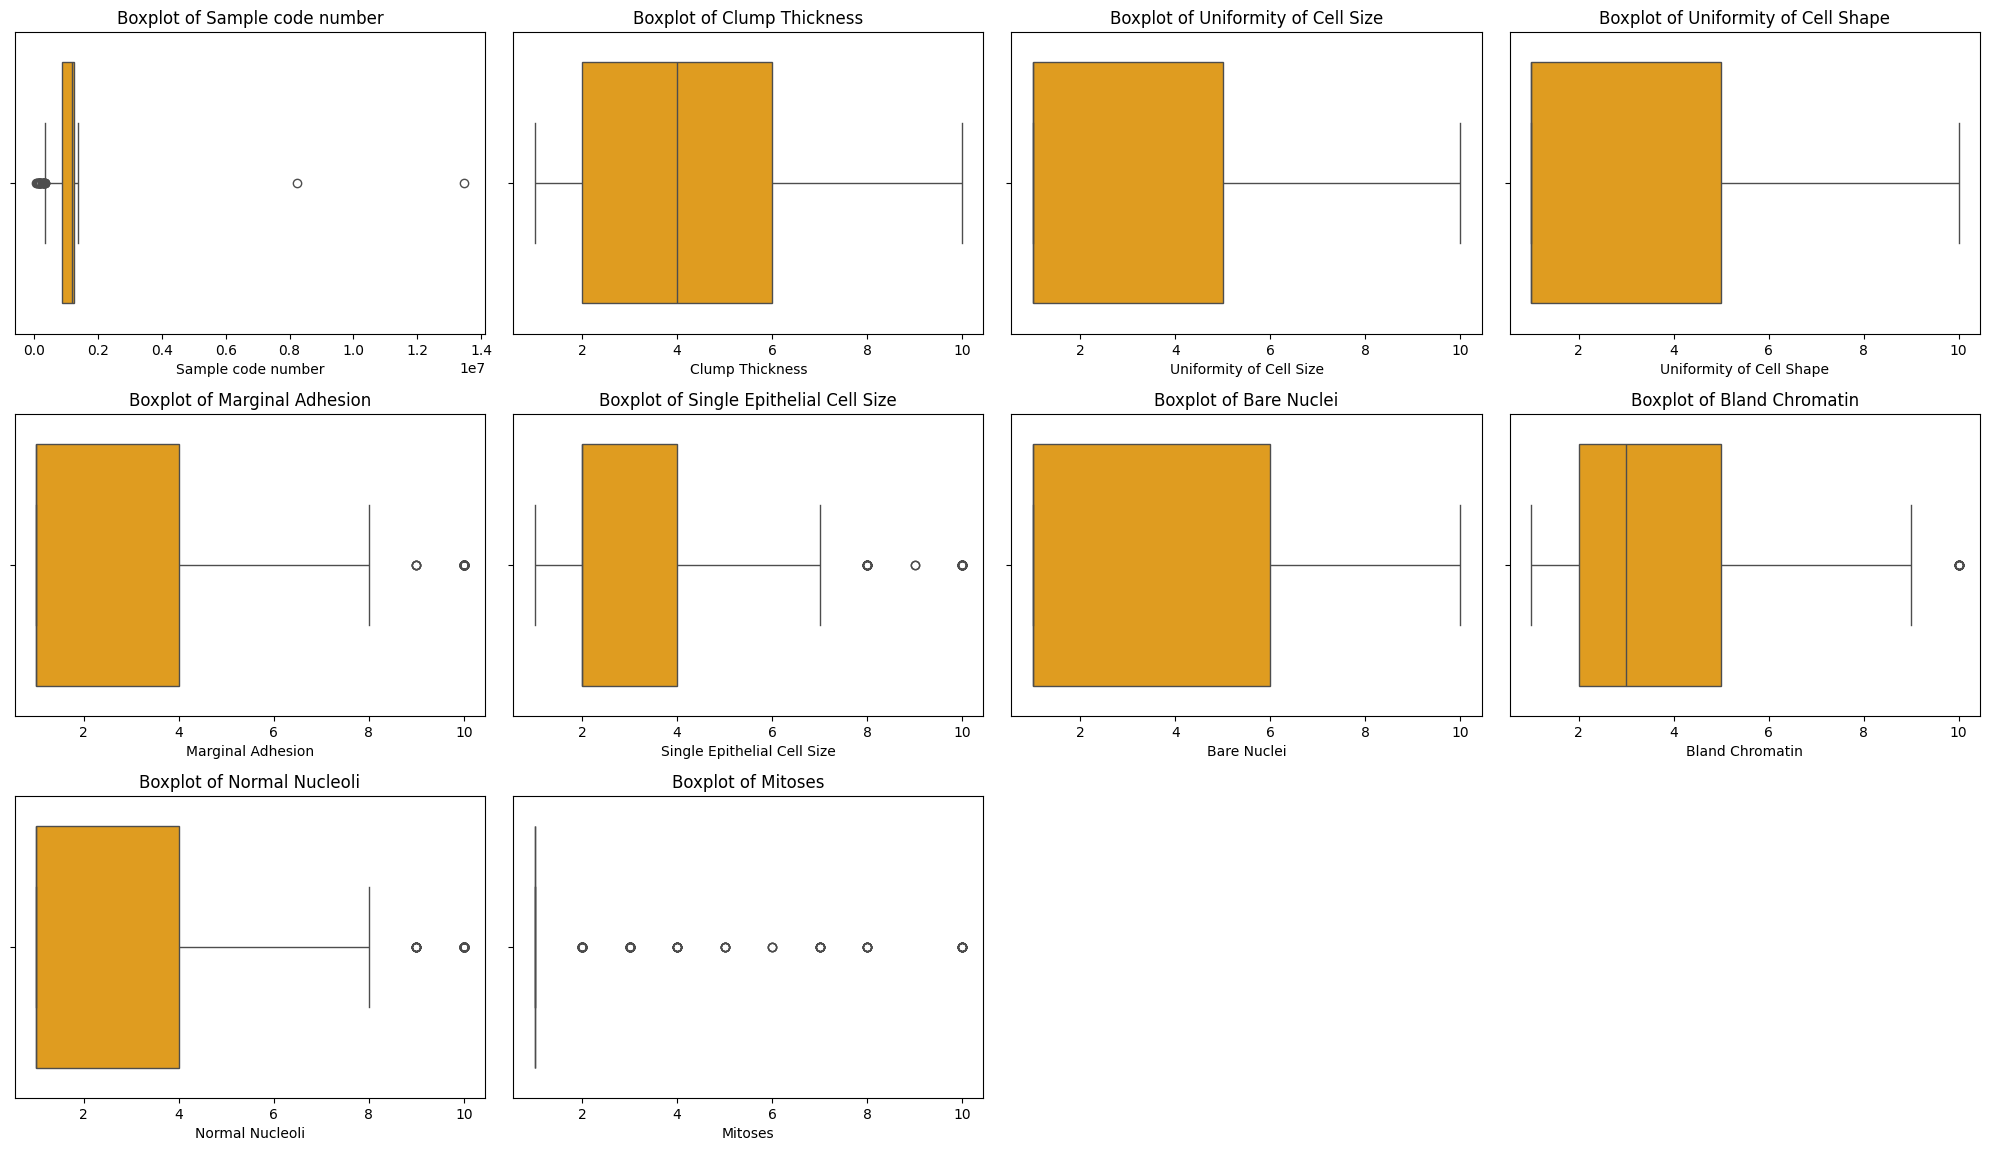

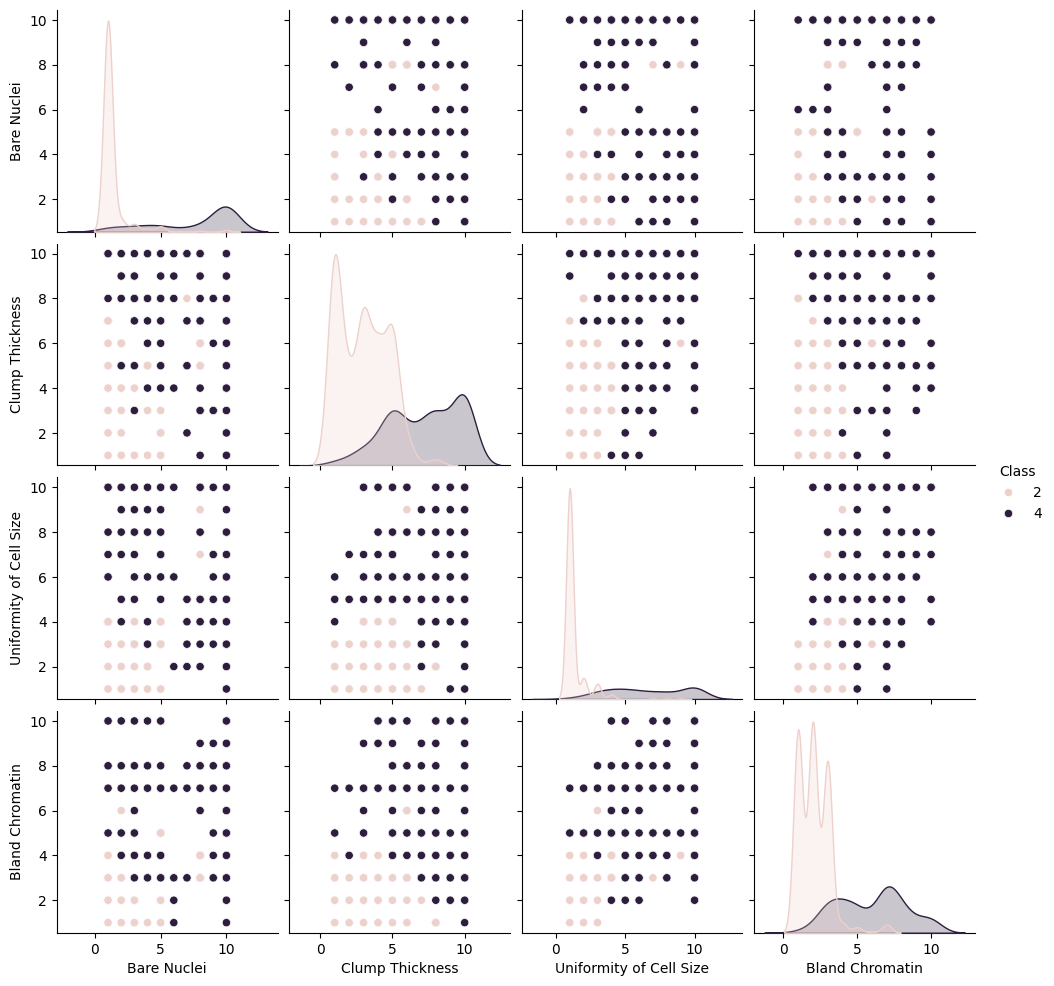

In [53]:
# 6. Boxplots for identifying outliers
plt.figure(figsize=(20, 15))
for idx, column in enumerate(dataset.columns[:-1]):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(data=dataset, x=column, color="orange")
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# 7. Pairplot to visualize feature relationships (using a subset to avoid overload)
subset_features = ['Bare Nuclei', 'Clump Thickness', 'Uniformity of Cell Size', 'Bland Chromatin', 'Class']
sns.pairplot(dataset[subset_features], hue='Class')
plt.show()

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[ 1.98839518 -0.69781134 -0.74152574 ...  0.61907387  0.34532102
  -0.33863738]
 [-1.22468404 -0.69781134 -0.74152574 ... -0.18860673 -0.62157783
  -0.33863738]
 [ 0.20335117 -0.69781134 -0.74152574 ... -0.18860673 -0.62157783
  -0.33863738]
 ...
 [-1.22468404 -0.69781134 -0.74152574 ... -0.99628733 -0.62157783
  -0.33863738]
 [-0.51066644 -0.69781134 -0.74152574 ... -0.59244703 -0.62157783
  -0.33863738]
 [ 1.98839518  1.90512627  1.27779124 ...  1.42675446  1.31221987
  -0.33863738]]


In [12]:
print(X_test)

[[-1.22468404 -0.69781134 -0.74152574 ... -0.99628733 -0.62157783
  -0.33863738]
 [-0.51066644 -0.69781134 -0.74152574 ... -0.59244703 -0.62157783
  -0.33863738]
 [ 0.20335117  0.60365746  0.60468558 ...  0.21523357  0.0230214
  -0.33863738]
 ...
 [-0.15365763 -0.69781134 -0.74152574 ... -0.99628733 -0.62157783
  -0.33863738]
 [-0.15365763  2.23049348  0.26813275 ...  2.23443506  2.27911872
  -0.33863738]
 [-0.86767524 -0.69781134 -0.74152574 ... -0.59244703 -0.62157783
  -0.33863738]]


## Training the Logistic Regression model on the Training set

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]]


## Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuract: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



[[84  3]
 [ 3 47]]
[[84  3]
 [ 3 47]]
Accuract: 96.70 %
Standard Deviation: 1.97 %


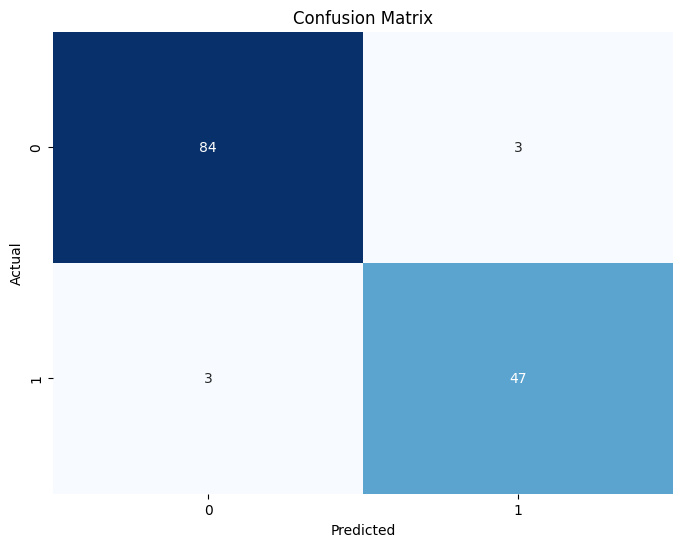

In [42]:
# Rebuilding the logistic regression classifier as per the user's provided setup
import seaborn as sns

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




## Subset of Futures model testing

In [59]:
# Define the subset of features and the target variable
subset_features = ['Bare Nuclei', 'Clump Thickness', 'Uniformity of Cell Size', 'Bland Chromatin']
X_subset = dataset[subset_features]
y_subset = (dataset['Class'] == 4).astype(int)  # Binary classification: 4 (malignant) as 1, 2 (benign) as 0

# Split the dataset into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_subset = scaler.fit_transform(X_train_subset)
X_test_subset = scaler.transform(X_test_subset)

# Train the Logistic Regression model on the subset of features
classifier_subset = LogisticRegression(random_state=0)
classifier_subset.fit(X_train_subset, y_train_subset)

# Predicting the test results
y_pred_subset = classifier_subset.predict(X_test_subset)

# Confusion matrix and accuracy score
cm_subset = confusion_matrix(y_test_subset, y_pred_subset)
accuracy_subset = accuracy_score(y_test_subset, y_pred_subset)

# Display the confusion matrix and accuracy
print("Confusion Matrix:\n", cm_subset)
print("Accuracy: {:.2f}%".format(accuracy_subset * 100))


Confusion Matrix:
 [[85  2]
 [ 4 46]]
Accuracy: 95.62%


##Subset's Log Reg results

Confusion Matrix:
* [[85  2]
* [ 4 46]]
* Accuracy: 95.62%
* Standard Deviation: 2.60 %


##All features's Log Reg results
* [[84  3]
 [ 3 47]]
* [[84  3]
 [ 3 47]]

* Accuract: 96.70 %
* Standard Deviation: 1.97 %


##Conclusion of Logistic Regression Models
We compared two logistic regression models—one using a subset of features and another using all features from the dataset. Here's the summary of the results:

#Subset's Logistic Regression Results:
#Confusion Matrix:
* True Negatives: 85
* False Positives: 2
* False Negatives: 4
* True Positives: 46
* Accuracy: 95.62%
* Standard Deviation (Cross-Validation): 2.60%
#All Features' Logistic Regression Results:
#Confusion Matrix:
* True Negatives: 84
* False Positives: 3
* False Negatives: 3
* True Positives: 47
* Accuracy: 96.70%
* Standard Deviation (Cross-Validation): 1.97%

#Model Comparison and Conclusion:

#Accuracy:

The model using all features performs slightly better, with an accuracy of 96.70%, compared to 95.62% for the subset model.
However, the difference is marginal, showing that the subset of features is almost as effective as using all the features.
Standard Deviation:

The all-features model has a lower standard deviation (1.97%) than the subset model (2.60%). This indicates that the all-features model is more stable across different cross-validation splits, suggesting slightly more consistent performance.
Simplicity vs. Performance:

The subset model uses only 4 key features and still performs very well, achieving over 95% accuracy. This model is simpler and might generalize better to new data due to reduced complexity.
On the other hand, the all-features model captures a bit more information, which might be slightly beneficial for accuracy but could potentially lead to overfitting.

#Conclusion:
If you prioritize simplicity and faster computation, the subset model is a strong choice with high accuracy and fewer features.
If you prefer maximizing accuracy and don't mind using all features, the all-features model offers a marginally better performance.
Both models perform exceptionally well, and the choice between them depends on your goal (simpler model vs. slightly higher accuracy).